In [ ]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot as plt

In [ ]:
def DeCasteljau(M,t):
  assert 0 <= t
  assert 1 >= t
  M = np.array(M)
  #port M to numpy
  dimPoint = np.shape(M)[1]
  #point dimension
  arrCurr = np.copy(M)
  #current point array
  numPoints = np.shape(arrCurr)[0]
  #current number of points
  arrEmpt = np.empty([0,dimPoint])
  #empty array of appropriate dimension
  pointEmpt = np.empty([0,0])
  #empty point
  arrRecur = np.copy(arrEmpt)
  #current recursive array
  while numPoints > 1:
    for n in range(numPoints-1):
      pointEval = np.copy(pointEmpt)
      #current point evaluation
      arrVec = np.array([arrCurr[n],arrCurr[n+1]])
      arrVec = np.transpose(arrVec)
      for i in range(dimPoint):
        vecComp = np.array([((-t+1)*arrVec[i][0])+(t*arrVec[i][1])])
        #vector component
        pointEval = np.concatenate((pointEval,vecComp),axis=None)
      pointEval = np.array([pointEval])
      arrRecur = np.concatenate((arrRecur,pointEval),axis=0)
      pointEval = np.copy(pointEmpt)
      #add pointEval to arrRecur and clear pointEval
    arrCurr = np.copy(arrRecur)
    arrRecur = np.copy(arrEmpt)
    #set arrCurr to arrRecur and clear arrRecur
    numPoints = np.shape(arrCurr)[0]
    #update numPoints
  assert numPoints == 1
  return arrCurr

In [ ]:
#using list form instead of numpy arrays
def BezierPoint(M,t):
  numPoints = len(M)
  R = []
  #new point list
  V = []
  #point vector
  if numPoints == 1:
    return M[0]
  else:
    for i in range(len(M)-1):
      V = []
      A = M[i]
      B = M[i+1]
      for j in range(len(M[i])):
        V += [((-t+1)*(A[j]) + t*(B[j]))]
        #evaluate each dimensional component of the vector from A to B
      R += [V]
    return BezierPoint(R,t)

In [ ]:
def BezierPlot2D(M):
  timeSteps = np.linspace(0,1,num=100)
  orderedPlotPoints = np.empty([0,2])
  for t in range(len(timeSteps)):
    orderedPlotPoints = np.concatenate((orderedPlotPoints,DeCasteljau(M,timeSteps[t])))
  parametricSegments = np.transpose(orderedPlotPoints)
  x = parametricSegments[0]
  y = parametricSegments[1]
  plt.plot(x,y)
  plt.show()
  return

In [ ]:
def BezierPlot(M):
  timeSteps = np.linspace(0,1,num=100)
  curvePoints = []
  for k in range(len(timeSteps)):
    curvePoints += [BezierPoint(M,k)]
  x = []
  y = []
  for p in range(len(curvePoints)):
    x += [curvePoints[p][0]]
    y += [curvePoints[p][1]]
  print(x)
  print(y)
  plt.plot(x,y)
  plt.show()

In [ ]:
A = [[-.75,.25],[-.25,.75],[.4,.4],[.25,-.5]]

In [ ]:
BezierPoint(A,0.5)

[-0.5]
[-0.5, 0.5]
[[-0.5, 0.5]]
[0.07500000000000001]
[0.07500000000000001, 0.575]
[[-0.5, 0.5], [0.07500000000000001, 0.575]]
[0.325]
[0.325, -0.04999999999999999]
[[-0.5, 0.5], [0.07500000000000001, 0.575], [0.325, -0.04999999999999999]]
[-0.2125]
[-0.2125, 0.5375]
[[-0.2125, 0.5375]]
[0.2]
[0.2, 0.26249999999999996]
[[-0.2125, 0.5375], [0.2, 0.26249999999999996]]
[-0.006249999999999992]
[-0.006249999999999992, 0.39999999999999997]
[[-0.006249999999999992, 0.39999999999999997]]


[-0.006249999999999992, 0.39999999999999997]

In [ ]:
DeCasteljau(A,0.5)

array([[-0.00625,  0.4    ]])

[-0.75, 0.25, -3.5500000000000003, -17.85, -48.35000000000001, -100.75, -180.75, -294.05000000000007, -446.35, -643.3499999999999, -890.75, -1194.25, -1559.5500000000004, -1992.35, -2498.3500000000004, -3083.25, -3752.75, -4512.550000000001, -5368.349999999999, -6325.850000000001, -7390.75, -8568.75, -9865.550000000001, -11286.850000000002, -12838.350000000002, -14525.75, -16354.749999999998, -18331.050000000003, -20460.350000000002, -22748.350000000006, -25200.75, -27823.25, -30621.550000000003, -33601.350000000006, -36768.350000000006, -40128.25, -43686.75, -47449.55, -51422.35000000001, -55610.85000000001, -60020.75, -64657.75, -69527.55000000002, -74635.85, -79988.35, -85590.75, -91448.75, -97568.05000000002, -103954.35000000002, -110613.35000000003, -117550.75, -124772.25000000003, -132283.55, -140090.35, -148198.35000000003, -156613.25, -165340.75000000003, -174386.55, -183756.35000000003, -193455.85000000003, -203490.75, -213866.75000000006, -224589.55, -235664.85000000003, -247

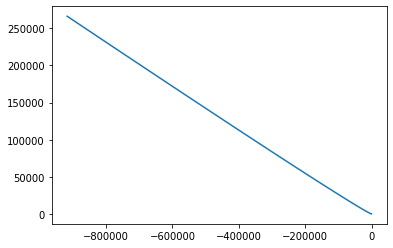

In [ ]:
BezierPlot(A)

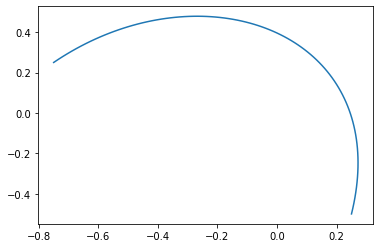

In [ ]:
BezierPlot2D(A)